In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X = np.array([[1,2], [1.5,1.8], [3,5], [3,2.5], [1,0.6], [3.5,4.4]])

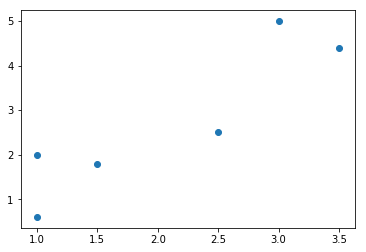

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [20]:
def fit(data, k=2 , max_iterations = 100):
    #Initializing the means
    means = []
    for i in range(k):
        means.append(data[i])
    for j in range(max_iterations):
        #Initializing the clusters
        clusters = []
        for i in range(k):
            clusters.append([])
        #Adding data points to respective clusters
        for point in data:
            #Find distance of a point from the mean of each clusters
            distances = [((point - mean)**2).sum() for mean in means]
            #Finding the mean with minimum distance
            minDistance = min(distances)
            #Index of mean with minimum distance
            index = distances.index(minDistance)
            #Adding the point to the respective cluster
            clusters[index].append(point)

        #Finding the new mean values 
        unchanged = False
        for i in range(k):
            new_mean = np.mean(clusters[i], axis = 0)
            if not np.array_equal(means[i], new_mean):
                unchanged = True
            means[i] = new_mean
        if not unchanged:
            break
    return means

In [25]:
def predict(test_data, means):
    predictions = []
    for point in test_data:
        distances = [((point - m)**2).sum() for m in means]
        minDistance = min(distances)
        index = distances.index(minDistance)
        predictions.append(index)
    return predictions

In [22]:
fit(X)

[array([1.16666667, 1.46666667]), array([3.16666667, 3.96666667])]

In [24]:
means = fit(X)
predict(X, means)

[0, 0, 1, 1, 0, 1]